MA0218 Exercise 2
=================

**Author:** Hankertrix




# Table of Contents







## Solutions



### Problem 1



#### (a)



Importing the required libraries.



In [1]:
from functools import partial
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Set the default Seaborn style for graphics
sb.set_theme()

Import the data.



In [2]:
csv_data = pd.read_csv("train.csv")

#### (b)



Print out the data types in the data.



In [3]:
print(csv_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


The data types are 64-bit integers, 64-bit floating point numbers and objects, which are most likely strings.



#### (c)



Grab the 64-bit integers from the data.



In [4]:
int64_data = csv_data.select_dtypes(include=["int64"])

print(int64_data)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0             2003         706           0        150  ...   

#### (d)



In [5]:
# Initialise the list of numeric variables
numeric_variables: list[str] = []

# Initialise the string for the data description
data_description: str = ""

# Read the data_description.txt file into the string
with open("data_description.txt", "r") as file:
    data_description = file.read()

# Initialise the variable to store the header index
header_index: int = 0

# Split the data description into lines
lines = data_description.split("\n")

# Iterate over the lines in the header
for index, line in enumerate(lines):

    # If the line is empty, skip it
    if not line:
        continue

    # Get the first letter in the line
    first_character = line[0]

    # If the line starts with an alphanumeric character
    # and contains a colon
    if first_character.isalnum() and ":" in line:

        # The line is a header, so get the description of the header,
        # which is the lines from the header index to the current index
        header_description = lines[header_index:index]

        # Set the header index to the current index
        header_index = index

        # If the header description doesn't have 2 lines exactly,
        # continue the loop
        if len(header_description) != 2:
            continue

        # Otherwise, get the first line which is the header
        header, _ = header_description

        # Split the header at the colon to get the variable name
        variable_name, _ = header.split(":")

        # Add the variable name to the list of numeric variables
        numeric_variables.append(variable_name)

# Add the sale price variable to the numeric variables
# as it is not inside the data descriptions
numeric_variables.append("SalePrice")

# Print out the list of numeric variables
print(numeric_variables)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#### (e)



Remove the non-numeric variables from the data.



In [6]:
cleaned_data = int64_data[int64_data.columns.intersection(numeric_variables)]

# Print the cleaned data
print(cleaned_data)

      LotArea  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        8450       2003          2003         706           0        150   
1        9600       1976          1976         978           0        284   
2       11250       2001          2002         486           0        434   
3        9550       1915          1970         216           0        540   
4       14260       2000          2000         655           0        490   
...       ...        ...           ...         ...         ...        ...   
1455     7917       1999          2000           0           0        953   
1456    13175       1978          1988         790         163        589   
1457     9042       1941          2006         275           0        877   
1458     9717       1950          1996          49        1029          0   
1459     9937       1965          1965         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  WoodDeckSF  \
0  

### Problem 2



#### (a)



Define a new describe function to include the mean.



In [7]:
def describe(
    data_frame: pd.DataFrame,
    additional_stats: list[str] = []
) -> pd.DataFrame:
    "Function to describe a data frame with additional statistics"

    # The 25% percentile function
    q_25 = partial(pd.Series.quantile, q=0.25)
    q_25.__name__ = "25%"

    # The 50% percentile function
    q_50 = partial(pd.Series.quantile, q=0.5)
    q_50.__name__ = "50%"

    # The 75% percentile function
    q_75 = partial(pd.Series.quantile, q=0.75)
    q_75.__name__ = "75%"

    # The list of default statistics
    default_stats = [
        "count",
        "mean",
        "std",
        "min",
        q_25,
        "median",
        q_75,
        "max",
    ]

    # Get the full list of statistics
    stats = default_stats + additional_stats

    # Call the agg method on the dataframe to get the
    # summary statistics of the data frame and return the result
    return data_frame.agg(stats)

Get the sale price data.



In [8]:
sale_price_data = cleaned_data["SalePrice"]

Print the summary statistics of the sale price data.



In [9]:
print(describe(sale_price_data))

count       1460.000000
mean      180921.195890
std        79442.502883
min        34900.000000
25%       129975.000000
median    163000.000000
75%       214000.000000
max       755000.000000
Name: SalePrice, dtype: float64


#### (b)



Plot the box plot of the sale price data.



<Axes: xlabel='SalePrice'>

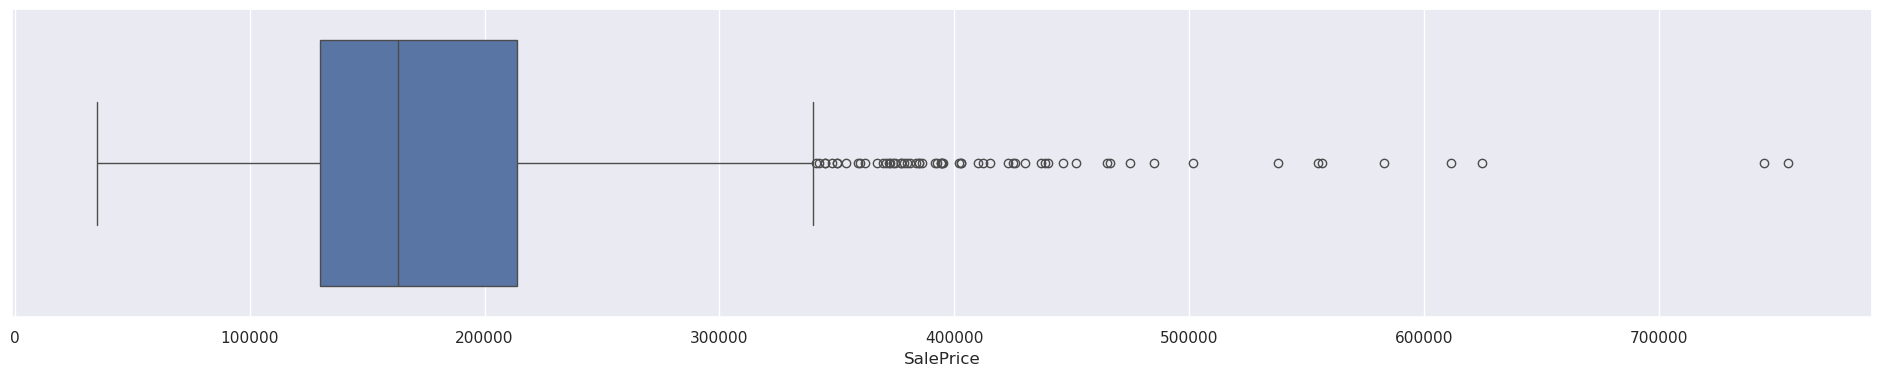

In [10]:
figure = plt.figure(figsize=(24, 4))
sb.boxplot(data=sale_price_data, orient="h")

Plot the histogram of the sale price data.



<Axes: xlabel='SalePrice', ylabel='Count'>

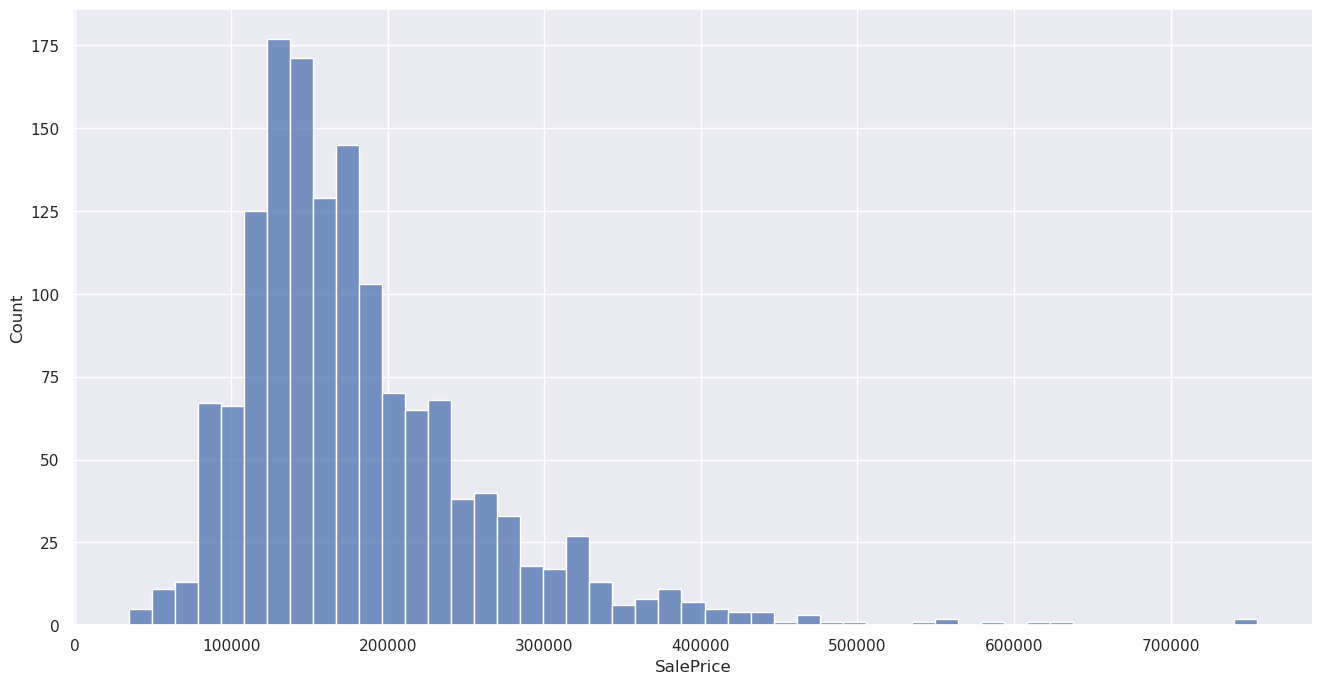

In [11]:
figure = plt.figure(figsize=(16, 8))
sb.histplot(data=sale_price_data)

Plot the kernel density estimate (KDE) of the sale price data.



<Axes: xlabel='SalePrice', ylabel='Density'>

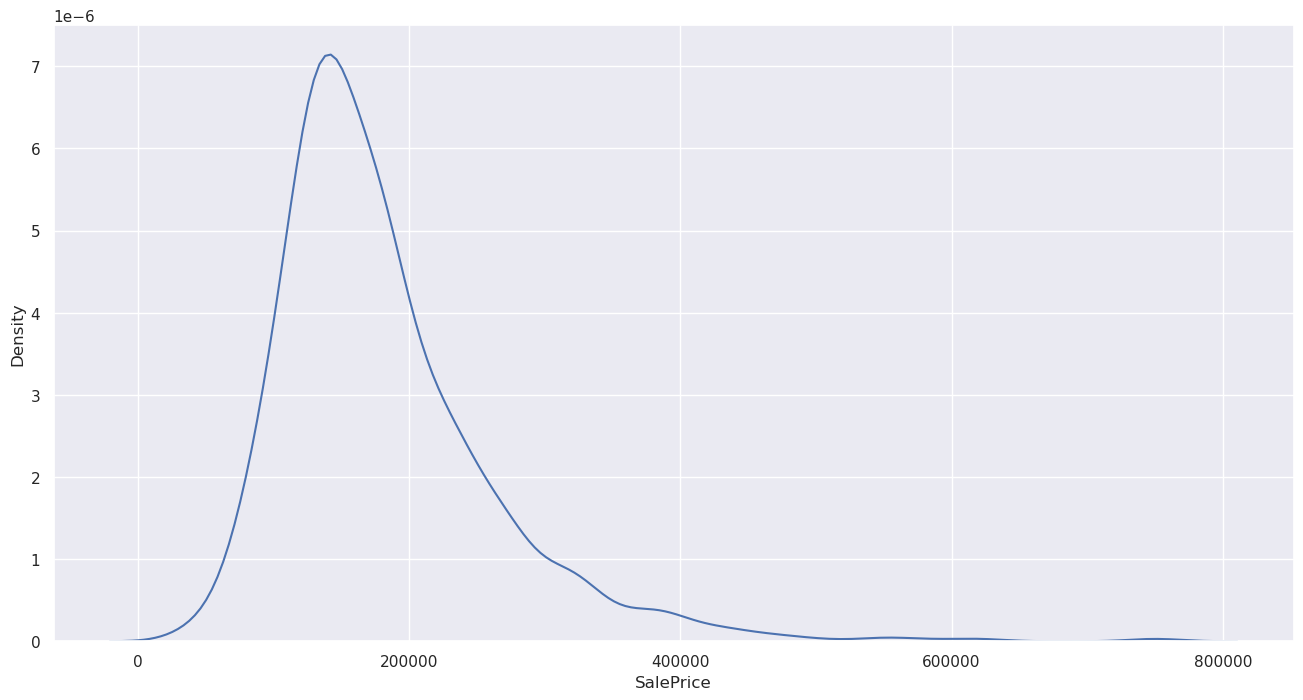

In [12]:
figure = plt.figure(figsize=(16, 8))
sb.kdeplot(data=sale_price_data)

#### (c)



Get the data regarding the area of the lots.



In [13]:
lot_area_data = cleaned_data["LotArea"]

Print the summary statistics of the data regarding the area of the lots.



In [14]:
print(describe(lot_area_data))

count       1460.000000
mean       10516.828082
std         9981.264932
min         1300.000000
25%         7553.500000
median      9478.500000
75%        11601.500000
max       215245.000000
Name: LotArea, dtype: float64


#### (d)



Plot the box plot of the data regarding the area of the lots.



<Axes: xlabel='LotArea'>

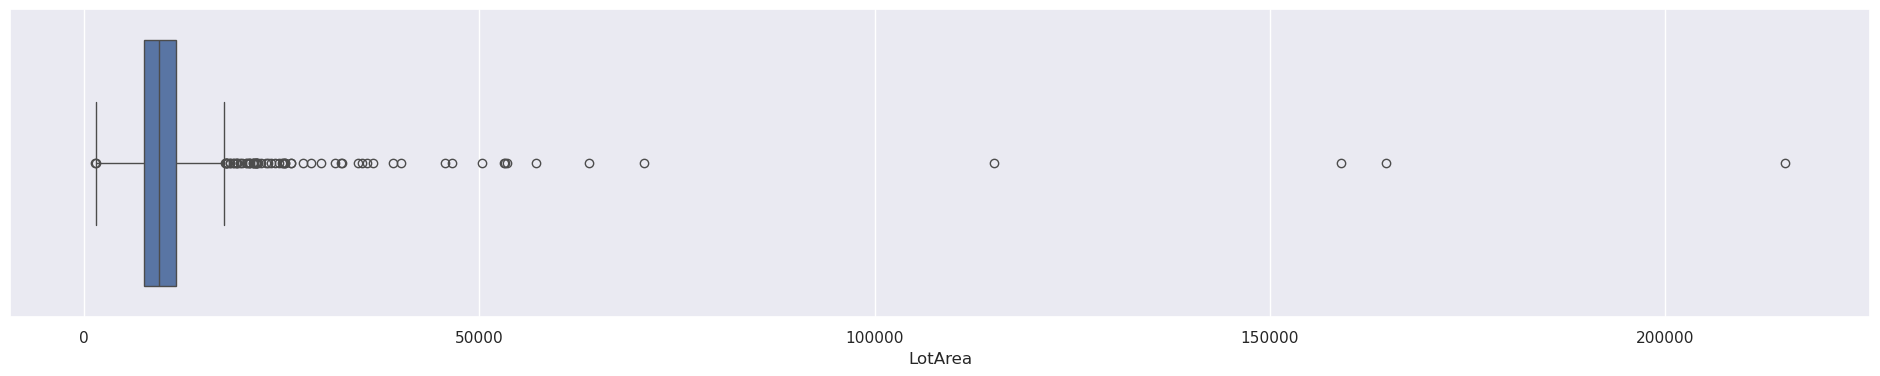

In [15]:
figure = plt.figure(figsize=(24, 4))
sb.boxplot(data=lot_area_data, orient="h")

Plot the histogram of the data regarding the area of the lots.



<Axes: xlabel='LotArea', ylabel='Count'>

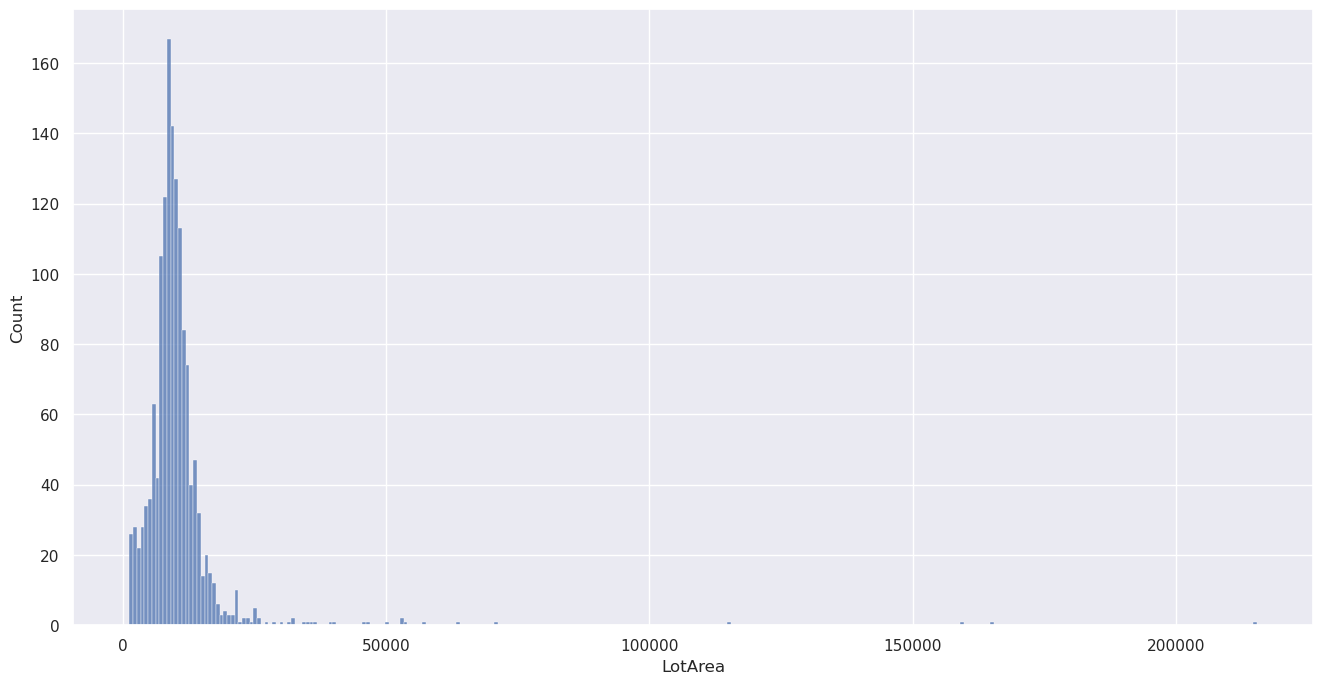

In [16]:
figure = plt.figure(figsize=(16, 8))
sb.histplot(data=lot_area_data)

Plot the kernel density estimate (KDE) of the data regarding the area of the lots.



<Axes: xlabel='LotArea', ylabel='Density'>

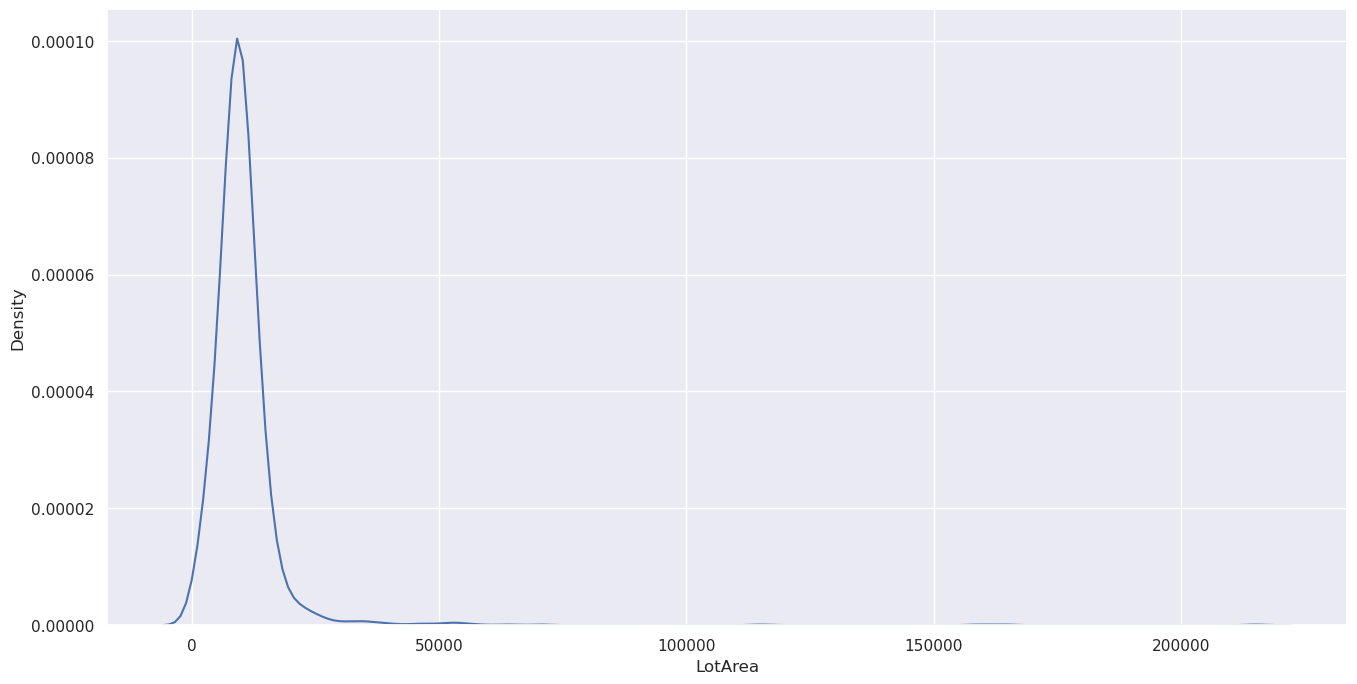

In [17]:
figure = plt.figure(figsize=(16, 8))
sb.kdeplot(data=lot_area_data)

#### (e)



Join the two data frames together and re-index based on the data regarding the area of the lots (x-axis).



In [18]:
joint_data = pd.concat([lot_area_data, sale_price_data], axis = 1).reindex(lot_area_data.index)

Plot the joint plot of sale price (y-axis) vs lot area (x-axis).



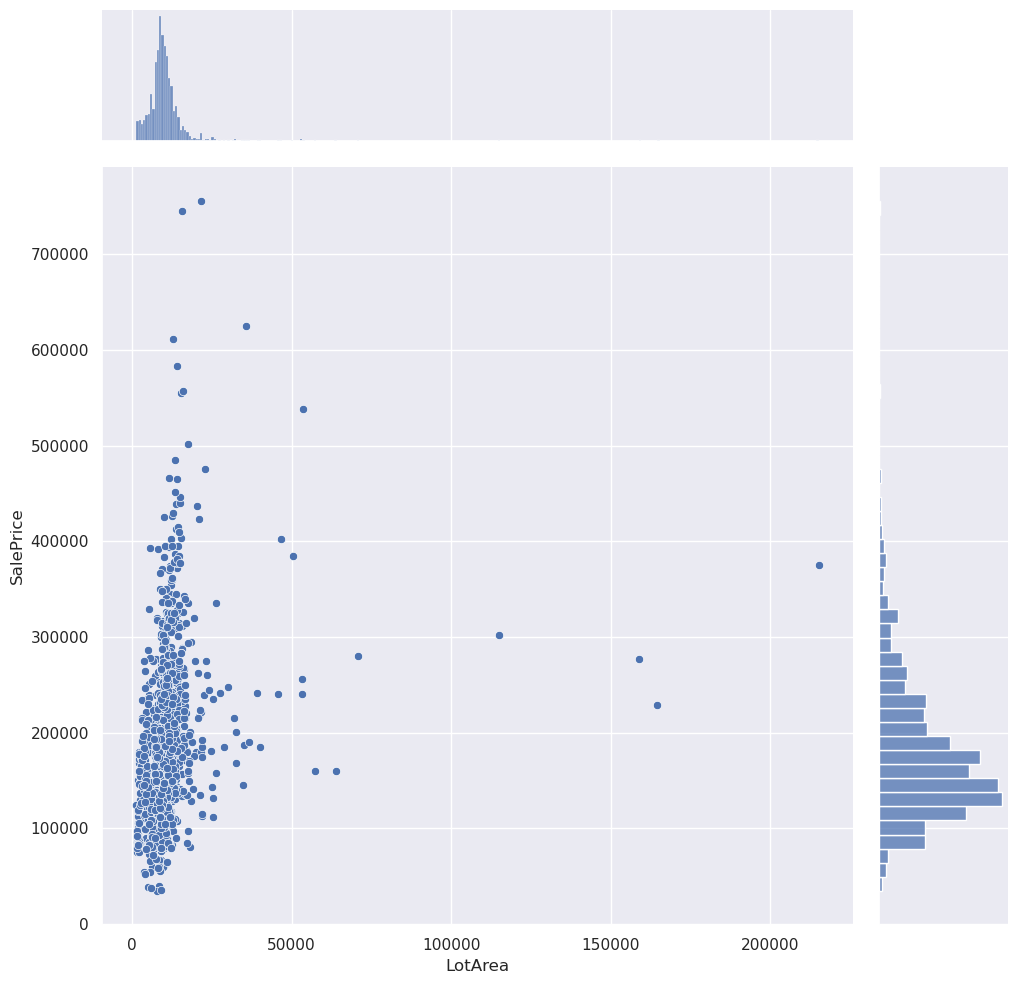

In [19]:
sb.jointplot(data=joint_data, x="LotArea", y="SalePrice", height=10)

Calculate the correlation coefficient between the two variables.



In [20]:
print(joint_data.corr())

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000
